In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv("letter-recognition.data",header = None)

In [ ]:
data.head()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,1:], data.iloc[:,0], test_size=0.10, random_state=42, stratify=data.iloc[:,0])

In [ ]:
X_train.head()



In [ ]:
print(X_train.shape)

In [ ]:
print()

In [ ]:
from sklearn.preprocessing import StandardScaler
S = StandardScaler()
X_train = S.fit_transform(X_train)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)
print(y_train[:10], y_test[:10])

# y_train = le.inverse_transform(y_train)
# y_test = le.inverse_transform(y_test)
# print(y_train[:10], y_test[:10])


In [ ]:
print(X_train.shape)

In [ ]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [ ]:
y_train

In [ ]:
y_soft = []
for i in y_train:
    l = [0 for j in range(26)]
    l[i] = 1
    y_soft.append(l)
y_soft = np.array(y_soft)

In [ ]:
y_soft[0,:]

In [ ]:
# Package imports
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib

# Display plots inline and change default figure size
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

In [ ]:
num_examples = len(X_train) # training set size
nn_input_dim = 16 # input layer dimensionality
nn_output_dim = 26 # output layer dimensionality

# Gradient descent parameters (I picked these by hand)
epsilon = 0.05 # learning rate for gradient descent
reg_lambda = 0.01 # regularization strength

In [ ]:
# Helper function to evaluate the total loss on the dataset
def calculate_loss(model):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation to calculate our predictions
    z1 = X_train.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    # Calculating the loss
    corect_logprobs = -np.log(probs[range(num_examples), y_train])
    data_loss = np.sum(corect_logprobs)
    # Add regulatization term to loss (optional)
    data_loss += reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    return 1./num_examples * data_loss

In [ ]:
# Helper function to predict an output (0 or 1)
def predict(model, x):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)

In [ ]:
# This function learns parameters for the neural network and returns the model.
# - nn_hdim: Number of nodes in the hidden layer
# - num_passes: Number of passes through the training data for gradient descent
# - print_loss: If True, print the loss every 1000 iterations
def build_model(nn_hdim, num_passes=20000, print_loss=False):
    
    # Initialize the parameters to random values. We need to learn these.
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))

    # This is what we return at the end
    model = {}
    loss = []
    
    # Gradient descent. For each batch...
    for i in range(0, num_passes):

        # Forward propagation
        z1 = X_train.dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

        # Backpropagation
        delta3 = probs
        delta3[range(num_examples), y_train] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
        dW1 = np.dot(X_train.T, delta2)
        db1 = np.sum(delta2, axis=0)

        # Add regularization terms (b1 and b2 don't have regularization terms)
        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1

        # Gradient descent parameter update
        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        W2 += -epsilon * dW2
        b2 += -epsilon * db2
        
        # Assign new parameters to the model
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
        loss.append(calculate_loss(model))
        
        
        # Optionally print the loss.
        # This is expensive because it uses the whole dataset, so we don't want to do it too often.
        if print_loss and i % 200 == 0:
            print("Loss after iteration %i: %f" %(i, calculate_loss(model)))
    
    
    return model,loss

In [ ]:
# Build a model with a 3-dimensional hidden layer
model,loss = build_model(6, num_passes=1000,print_loss=True)
plt.plot(loss)

# # Plot the decision boundary
# plot_decision_boundary(lambda x: predict(model, x))
# plt.title("Decision Boundary for hidden layer size 3")

In [ ]:
plt.plot(loss)

In [ ]:
plt.figure(figsize=(16, 32))
hidden_layer_dimensions = [3, 5, 10, 15, 20]

for i, nn_hdim in enumerate(hidden_layer_dimensions):
    print(nn_hdim)
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer size %d' % nn_hdim)
    model,loss = build_model(nn_hdim)
    plt.plot(loss)
plt.show()

In [ ]:
model,loss = build_model(10, num_passes=1000,print_loss=True)
plt.plot(loss)

In [ ]:
model,loss = build_model(15, num_passes=1000,print_loss=True)
plt.plot(loss)

In [ ]:
model,loss = build_model(20, num_passes=1000,print_loss=True)
plt.plot(loss)

In [ ]:
model,loss = build_model(25, num_passes=1000,print_loss=True)
plt.plot(loss)

In [ ]:
X = np.random.randint(1,10,[2,3])
X

In [ ]:
np.sum(X,axis=1,keepdims=True)

In [ ]:
e = np.exp(X)
s = np.sum(e,axis=1,keepdims=True)
s = e/s
s

In [ ]:
g = np.random
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        

In [ ]:
class optimizer:
    def __init__(self):
       
        
        raise NotImplementedError
        
class activation_funcntion:
    def __init__(self):
        pass
#         self.name = name
#         raise NotImplementedError
    def tanh(self, input_data):
        return np.tanh(input_data),1-np.tanh(input_data)**2
    
#     def tanh_prime(self, input_data):
#         return 1-np.tanh(input_data)**2
    def Relu(self, x):
        return x,1
#     def activation(self, name):
#         if name == "tanh":
#             return 
        
        
class loss_function:
    def __init__(self):
        self.name = "cross_entropy"
#         raise NotImplementedError
    
    def cross_entropy(self, Y, Yhat):
        loss = np.sum(-np.log(Yhat)*Y)
        return loss
#         pass
#         return Y-Yhat
#         raise NotImplementedError
    

    def cross_entropy_prime(self, Y, Yhat):
        loss_prime = -Y/Yhat
        return loss_prime
#         return Y-Yhat
#         raise NotImplementedError
    
    def loss(self, Y, Yhat, name):
        self.name = name
        if self.name == "cross_entropy":
            return self.cross_entropy(Y, Yhat)
    
    def loss_prime(self, Y, Yhat):
#         self.name = name
        if self.name == "cross_entropy":
            return self.cross_entropy_prime(Y, Yhat)
    

        
        
        
        

    

In [ ]:
from loss_func import loss_function
class Neural_Network_Classifier:
    def __init__(self,):
        self.layers = []
        self.loss = None
        self.loss_prime = None
#         raise NotImplementedError
        
    def add_layer(self,layer):
        self.layers.append(layer)
        
#         raise NotImplementedError
#     def optimizer()
    
    
    def train(self, X, y, optimizer = "adam", epoch = 100, learning_rate = 0.01):
        self.loss = loss_fucntion
        samples = len(X)
        
        # training loops
        for i in range(epoch):
            
            err = o
            for j in range(samples):
                output = X[j]
                for layer in self.layers:
                    output = layer.forward_propagation(output)
                    
                # computing loss for display purpose only
                err += self.loss.loss(y[j], output, name)
                
                #Back Propagation
                error = self.loss.loss_prime(y[j], output)
                for layers in reversed(self.layers):
                    error = layer.backward_propagation(error, learning_rate)
            err /= samples
            print("epoch %d%d error = %f"%(i+1, epochs, err))
            
                

#             for layers in reversed(self.layers):
#                 error = layer.backward_propagation(error, learning_rate)
                
#         raise NotImplementedError
        
    def predict(self, X):
        #Number of instances
        samples = len(X)
        result = []
        
        #computing output for each input
        for i in range(samples):
            output = X
            for layer in self.layers:

                output = layer.forward_propagation(output)
        return output
    
        
#         raise NotImplementedError
        
        
        
        
    
        
    
    

In [ ]:
class FC_layer:
    def __init__(self,input_size, output_size, weight_inialization = "xavier"):
        self.input = None
        self.output = None
        self.input_size = input_size
        self.output_size = output_size
        self.weight_inialization = weight_inialization
        
        self.weights, self.bias = self.weight_init(self.input_size, self.output_size, weight_inialization)
        
    def weight_init(self, input_size, output_size, weight_inialization):
        if weight_inialization == "xavier":
            var = 1/input_size
            weigths = np.random.normal(0,var ,(input_size,output_size))
            bias = np.zeros((input_size,output_size))
#             pass
        
        elif weight_inialization = "random":
            weights = np.random.rand(input_size, output_size) - 0.5
            bias = np.random.rand(1, output_size) - 0.5
            return weights, bais
    
    def forward_propagation(self, input_data):
        self.input = input_data
        self.output = np.dot(self.input, self.weights) + self.bias
        return self.output
    
    def backward_propagation(self, df_output, learning_rate):
        df_input = np.dot(df_output, self.weights.T)
        df_weights = np.dot(self.input.T, df_output)
        
        D = {"df_I":df_input,
             "df_W":df_weights,
            }
        
        return D
    
        
            
        

In [ ]:
from act_func import activation_function
class Activation_Layer:
    def __init__(self,input_size, output_size, A_funct = "tanh"):
        self.input = None
        self.output = None
        self.A_funct = A_funct
#         self.input_size = input_size
#         self.output_size = output_size
        self.act_class = activation_function
        
#         if self.A_funct=="tanh":
#             self.act, self.act_prime =  self.act_class

    def forward_propogation(self, input_data):
        self.input = input_data
        self.output = self.act_class.activation(name=self.A_funct, x=input_data)
        return self.output
    
    def backward_propagation(self, df_output):
        return self.act_class.activation_prime(x=input_data)*df_output
    
    
    
        
        
        

    


        
        

In [ ]:
#sigmoid layer
class softmax_layer:
    def __init__(self, input_size):
        self.input = None
        self.output = None
        self.input_size = input_size
        
    def forward_propagation(self, input_data):
        self.input = input_data
        x_exp = np.exp(self.input)
        x_sum = np.sum(x_exp, axis=1, keepdims=True)
        self.output = x_exp/x_sum
        return self.output
    
    def backward_propagation(self, df_output, learning_rate):
        Dz_x = np.zeros((self.input_size,self.input_size))
        for i in range(self.input_size):
            for j in range(self.input_size):
                if i == j:
                    Dz_x[i,j] = self.output[i]*(1-self.output[i])
                else:
                    Dz_x[i,j] = -self.output[i]*self.output[j]
                    
        DL_x = np.dot(df_output,Dz_x)
        return DL_x
        
        
        
        
        

In [ ]:
# soft max testing

In [ ]:
from softmax import softmax_layer

In [ ]:
S = softmax_layer(4)

In [ ]:
dL_z = np.random.normal(0,0.1 ,(1,4))

In [ ]:
dL_z.shape

In [ ]:
x = np.array([[0.2,0.5,0.4,0.9]])

In [ ]:
x.shape

In [ ]:
output = S.forward_propagation(x)

In [ ]:
x = S.backward_propagation(dL_z, learning_rate=0.1)

In [ ]:
x.shape

In [ ]:
output[0]

### Testing of loss fucntion

In [ ]:
from loss_func import loss_function

In [ ]:
 y = y_soft[0]

In [ ]:
yhat = np.random.uniform(0,1,(1,26))
yhat

In [ ]:
Cel = loss_function()
Cel.loss(Y=y, Yhat=yhat, name="cross_entropy")

In [ ]:
y

In [ ]:
Cel.loss_prime()

### Testing of Adam optimizer

In [ ]:
W = np.random.uniform(0,0.1, (4,5))
B = np.random.uniform(0, 0.1, (1,5))

In [ ]:
dW = np.random.uniform(0,1, (4,5))
dB = np.random.uniform(0, 1, (1,5))

In [ ]:
from Adam import AdamOptim
optimizer = AdamOptim()

In [ ]:
w,b = optimizer.update(t=100, w = W, b= B, dw=dW, db= dB)

In [ ]:
w

In [ ]:
b

# Making of Neural Network

In [ ]:
%%time
from activation_layer import Activation_Layer
from fc_layer import FC_layer
from Network import Neural_Network_Classifier
from softmax import softmax_layer



nn_classifier = Neural_Network_Classifier()
nn_classifier.add_layer(FC_layer(16, 5, weight_inialization="xavier"))
nn_classifier.add_layer(Activation_Layer(A_funct="tanh"))
nn_classifier.add_layer(FC_layer(5, 26, weight_inialization="xavier"))
nn_classifier.add_layer(softmax_layer(26))

nn_classifier.train(X_train, y_soft, optimizer="adam", epoch=100, learning_rate = 0.1)



In [ ]:
%%time
X_test = np.array(X_test)

In [ ]:
%%time
yhat = nn_classifier.predict(X_test)


In [ ]:
yhat[0
    ].sum()

In [ ]:
sample = np.random.normal(0,0.1,(4000,4000))

In [ ]:
sample

In [ ]:
# sample[0,:]

In [ ]:
np.sum(sample)/16000000

In [ ]:
np.mean(sample)

In [ ]:
np.zeros((15,30))

In [ ]:
Yhat = np.random.normal(1,0.01,(1,10))
Yhat

In [ ]:
Y = np.zeros((1,10))
Y[:,3] = 1
Y

In [ ]:
np.sum(-np.log(Yhat)*Y)

In [ ]:
-Y/Yhat

In [ ]:
dL = np.zeros((1,4))

In [ ]:
dL[:,1] = 1
dL

In [ ]:
dY = np.random.uniform(1,10,(4,4))
dY

In [ ]:
dY*dL.T

In [ ]:
# testing of FC layer

In [ ]:
from fc_layer import FC_layer
FC = FC_layer(16,5,weight_inialization="xavier")

In [ ]:
FC.weights


In [ ]:
FC.weights.shape

In [ ]:
FC.bias

In [ ]:
FC.bias.shape

In [ ]:
X_train[0]


In [ ]:
print(X_train[0].shape)

In [ ]:
np.dot(X_train[0],FC.weights).reshape(1,5)

In [3]:
import numpy as np

In [4]:
from Adam import AdamOptim
adam = AdamOptim(eta=0.1, beta1=0.9, beta2=0.999, epsilon=1e-8)

In [5]:
dw = np.random.normal(0,1,(4,5))
db = np.random.normal(0,1,(5,1))
w = np.random.normal(0,1,(4,5))
b = np.random.normal(0,1,(5,1))

In [5]:
db

array([[0.31748791],
       [0.34644198],
       [1.72838268],
       [0.73905188],
       [1.23441079]])

In [6]:
adam.update(t=10, w=w, b=b, dw=dw, db=db)

[[0.0101253 ]
 [0.01205631]
 [0.30007742]
 [0.05486601]
 [0.15306395]]


(array([[-0.93427712, -0.53524016, -1.09862751, -1.72479785,  0.70566303],
        [-1.39170066,  0.43559766, -0.41097931, -1.13711407, -1.37717428],
        [-0.79529364,  1.25084449,  0.33075867, -0.22262226, -2.62577482],
        [ 1.56856268,  1.74434742, -1.59079826, -2.72799106, -0.65844032]]),
 array([[-1.18903234],
        [-0.67379686],
        [ 0.6732344 ],
        [ 0.28374624],
        [-0.09211479]]))

In [7]:
w

array([[-0.98271975, -0.48679754, -1.14707014, -1.67635523,  0.75410567],
       [-1.4401433 ,  0.48404029, -0.45942194, -1.18555671, -1.42561691],
       [-0.84373628,  1.29928713,  0.28231603, -0.27106489, -2.67421746],
       [ 1.61700532,  1.79279006, -1.54235563, -2.67954857, -0.70688295]])

In [16]:
w.shape
np.zeros(w.shape)

AttributeError: 'int' object has no attribute 'shape'

In [23]:
w = np.maximum(0,w)
print(w)
w[w>0] = 1
w

[[0. 0. 0. 1. 1.]
 [0. 1. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


array([[0., 0., 0., 1., 1.],
       [0., 1., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [10]:
from act_func import activation_function
activation = activation_function()
w

array([[ 0.12860501,  1.43530235,  0.49785275, -0.38339687,  0.18658595],
       [ 1.07428441, -1.39508337, -0.0739996 ,  1.69579665,  0.29267518],
       [-0.60332555,  1.13907548,  1.77741002,  1.54952557,  1.34283672],
       [-0.55746597, -1.45232232,  0.63658664,  0.42877084,  1.07849402]])

In [8]:
activation.activation(name="relu", x=w)

array([[0.12860501, 1.43530235, 0.49785275, 0.        , 0.18658595],
       [1.07428441, 0.        , 0.        , 1.69579665, 0.29267518],
       [0.        , 1.13907548, 1.77741002, 1.54952557, 1.34283672],
       [0.        , 0.        , 0.63658664, 0.42877084, 1.07849402]])

In [9]:
activation.activation_prime(x=w)

array([[1., 1., 1., 0., 1.],
       [1., 0., 0., 1., 1.],
       [0., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1.]])

In [19]:
import matplotlib.pyplot as plt


In [ ]:
!pip inst

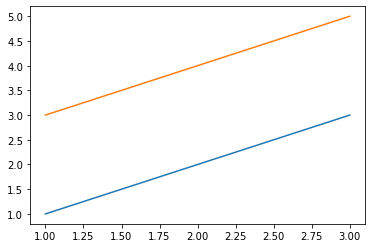

In [20]:
import matplotlib.pyplot as plt
x_coordinates = [1, 2, 3]

y1_coordinates = [1, 2, 3]
y2_coordinates = [3, 4, 5]

fig = plt.figure(1)
plt.plot(x_coordinates, y1_coordinates) # plot first line
plt.plot(x_coordinates, y2_coordinates) # plot second line
plt.show()

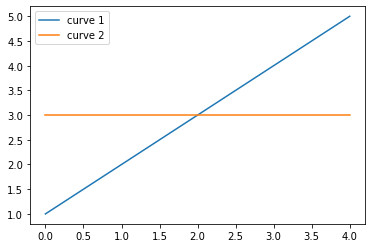

In [22]:

# importing package
import matplotlib.pyplot as plt
import numpy as np
  
# create data
x = [1,2,3,4,5]
y = [3,3,3,3,3]
  
# plot lines
# plt.plot(x,label = "line 1")
# plt.plot(y, label = "line 2")
plt.plot(x, label = "curve 1")
plt.plot(y, label = "curve 2")
plt.legend()
plt.show()